### use script to find top results from grid search

In [1]:
import pandas as pd
import os

def find_top_recall_csvs(folder_path):
    # dictionary to hold file names and their corresponding recall macro avg
    recall_scores = {}

    # loop through each file in the directory
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):  # Ensure the file is a CSV
            file_path = os.path.join(folder_path, file_name)
            try:
            
                df = pd.read_csv(file_path)
                
             
                macro_avg_recall = df[df['data'] == 'macro avg']['recall'].values[0]
                
    
                recall_scores[file_name] = macro_avg_recall
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

    # sort files by recall score in descending order and select the top 4
    top_files = sorted(recall_scores, key=recall_scores.get, reverse=True)[:8]
    
    results = []
    for file in top_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        results.append((file, df))

    return results




File: results_2023_16_50_512_8_6e-05_0.99.csv
           data  precision    recall  f1-score   support  specificity
0           LLE   0.759429  0.838095  0.746302  14.80000     0.427632
1            TD   0.646429  0.627632  0.430105   9.00000     0.427632
2      accuracy   0.675450  0.675450  0.675450   0.67545     0.427632
3     macro avg   0.702929  0.732863  0.588204  23.80000     0.427632
4  weighted avg   0.850203  0.675450  0.684944  23.80000     0.427632


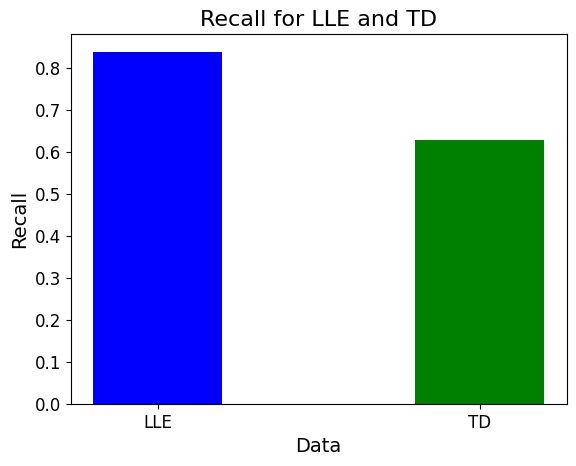

File: results_2023_16_50_512_8_5e-05_0.99.csv
           data  precision    recall  f1-score    support  specificity
0           LLE   0.759429  0.818571  0.731112  14.800000     0.427632
1            TD   0.642017  0.627632  0.425362   9.000000     0.427632
2      accuracy   0.658042  0.658042  0.658042   0.658042     0.427632
3     macro avg   0.700723  0.723102  0.578237  23.800000     0.427632
4  weighted avg   0.849223  0.658042  0.670581  23.800000     0.427632
File: results_2023_8_50_512_8_5e-05_0.99.csv
           data  precision    recall  f1-score    support  specificity
0           LLE   0.761636  0.799048  0.722579  14.800000     0.440132
1            TD   0.575000  0.640132  0.414286   9.000000     0.440132
2      accuracy   0.653492  0.653492  0.653492   0.653492     0.440132
3     macro avg   0.668318  0.719590  0.568433  23.800000     0.440132
4  weighted avg   0.831425  0.653492  0.665274  23.800000     0.440132
File: results_2023_8_50_1024_8_6e-05_0.99.csv
           

In [43]:
import matplotlib.pyplot as plt

# Example usage
folder_path = '/home/benjaminbarrera-altuna/Desktop/LLE/multimodal/self/joint_text/bike/100'
top_recall_files = find_top_recall_csvs(folder_path)
for file_name, data in top_recall_files:
    print(f"File: {file_name}")
    print(data)
    if file_name == "results_2023_16_50_512_8_6e-05_0.99.csv":
         
        df_filtered = data.iloc[0:2]

        # Plotting the bar graph
        plt.bar(df_filtered['data'], df_filtered['recall'], width=0.4, color=['blue', 'green'])
        plt.xlabel('Data', fontsize=14)
        plt.ylabel('Recall', fontsize=14)
        plt.title('Recall for LLE and TD', fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
        data.to_csv("test.csv", index=False)